In [1]:
#pip install kagglehub

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

### Extracting the dataset from Kaggle and save it locally 

In [3]:
# Extract latest version of cities housing market dataset from Kaggle 
path = kagglehub.dataset_download("vincentvaseghi/us-cities-housing-market-data")
# print the path to locate the file directory
print("Path to dataset files:", path)

Path to dataset files: C:\Users\andre\.cache\kagglehub\datasets\vincentvaseghi\us-cities-housing-market-data\versions\33


In [4]:
# Set the correct path to the directory
directory_path =  "\\Users\\andre\\.cache\\kagglehub\\datasets\\vincentvaseghi\\us-cities-housing-market-data\\versions\\33"

# check the files under the directory which the dataset is downloaded 
print("Files in the directory:", os.listdir(directory_path))

Files in the directory: ['city_market_tracker.tsv000']


In [5]:
# combine the directory path and the dataset file in to a single file path 
file_path = os.path.join(directory_path, 'city_market_tracker.tsv000')

# Open the TSV file using panda dataframe 
df = pd.read_csv(file_path, sep='\t')

# Display the first 5 rows of the dataset
df.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2016-07-01,2016-07-31,30,place,6,9989,f,"Liberty Lake, WA",Liberty Lake,Washington,...,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Spokane, WA",44060,2025-01-13 14:16:48
1,2014-01-01,2014-01-31,30,place,6,5334,f,"Edgewood, WA",Edgewood,Washington,...,0.714286,0.264706,0.204100,0.178992,0.222222,0.222222,0.055556,"Tacoma, WA",45104,2025-01-13 14:16:48
2,2019-04-01,2019-04-30,30,place,6,26576,f,"White Meadow Lake, NJ",White Meadow Lake,New Jersey,...,-0.100000,0.290323,0.118894,0.132428,0.000000,0.000000,0.000000,"Newark, NJ",35084,2025-01-13 14:16:48
3,2017-04-01,2017-04-30,30,place,6,5544,f,"Englewood, NJ",Englewood,New Jersey,...,0.086957,0.165803,-0.035255,-0.034197,0.138889,0.069923,0.098889,"New York, NY",35614,2025-01-13 14:16:48
4,2020-07-01,2020-07-31,30,place,6,21435,f,"Belvedere, SC",Belvedere,South Carolina,...,0.750000,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Augusta, GA",12260,2025-01-13 14:16:48


In [6]:
num_rows = len(df)
print(f"Number of Rows: {num_rows}")

Number of Rows: 5708042


### Transforming the data

In [7]:
# Extracting NC, Virginia, Texas data 
filtered_df = df[df['state'].isin(['North Carolina', 'Texas', 'Virginia'])]

# Display the first 5 rows of the filtered data
filtered_df.head(10)


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
5,2024-04-01,2024-04-30,30,place,6,8805,f,"Holiday Lakes, TX",Holiday Lakes,Texas,...,NaN,0.333333,NaN,NaN,0.000000,NaN,NaN,"Houston, TX",26420,2025-01-13 14:16:48
12,2024-05-01,2024-05-31,30,place,6,10173,f,"Krugerville, TX",Krugerville,Texas,...,0.023810,0.066667,-0.155556,-0.361905,0.500000,0.333333,0.333333,"Dallas, TX",19124,2025-01-13 14:16:48
25,2024-07-01,2024-07-31,30,place,6,475,f,"Alice, TX",Alice,Texas,...,-0.051948,0.105263,-0.022396,-0.052632,0.333333,0.333333,0.102564,"Alice, TX",10860,2025-01-13 14:16:48
47,2021-04-01,2021-04-30,30,place,6,475,f,"Alice, TX",Alice,Texas,...,0.333333,NaN,NaN,NaN,0.312500,-0.072115,0.312500,"Alice, TX",10860,2025-01-13 14:16:48
55,2013-04-01,2013-04-30,30,place,6,1855,f,"Bedford, TX",Bedford,Texas,...,-0.333333,NaN,NaN,NaN,0.333333,-0.238095,0.333333,"Fort Worth, TX",23104,2025-01-13 14:16:48
58,2013-04-01,2013-04-30,30,place,6,18721,f,"Trent, TX",Trent,Texas,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,"Abilene, TX",10180,2025-01-13 14:16:48
61,2016-06-01,2016-06-30,30,place,6,25346,f,"Pimmit Hills, VA",Pimmit Hills,Virginia,...,0.000000,0.357143,0.090476,0.119048,0.500000,0.277778,0.100000,"Washington, DC",47894,2025-01-13 14:16:48
83,2022-11-01,2022-11-30,30,place,6,19395,f,"Watauga, TX",Watauga,Texas,...,-0.384921,0.393939,-0.223708,0.240093,0.272727,0.009569,-0.314229,"Fort Worth, TX",23104,2025-01-13 14:16:48
93,2017-01-01,2017-01-31,30,place,6,19205,f,"Wrightsville Beach, NC",Wrightsville Beach,North Carolina,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,"Wilmington, NC",48900,2025-01-13 14:16:48
105,2012-07-01,2012-07-31,30,place,6,23438,f,"Inez, TX",Inez,Texas,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,"Victoria, TX",47020,2025-01-13 14:16:48


In [8]:
#filtered_df.dtypes

In [9]:
# Extracting 2020 - 2025 data from period begin and period end columns
# convert the datatype to of columns that have dates to filter the dataset based on years
filtered_df['period_begin'] = pd.to_datetime(filtered_df['period_begin'], errors='coerce')
filtered_df['period_end'] = pd.to_datetime(filtered_df['period_end'], errors='coerce')

# Filter the data from 2020 - 25
five_years_data = filtered_df[
    (filtered_df['period_begin'].dt.year >= 2020) & 
    (filtered_df['period_end'].dt.year <= 2025)
]
print(five_years_data.tail())

C:\Users\andre\AppData\Local\Temp\ipykernel_17432\545104302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['period_begin'] = pd.to_datetime(filtered_df['period_begin'], errors='coerce')
C:\Users\andre\AppData\Local\Temp\ipykernel_17432\545104302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['period_end'] = pd.to_datetime(filtered_df['period_end'], errors='coerce')


        period_begin period_end  period_duration region_type  region_type_id  \
5707967   2023-10-01 2023-10-31               30       place               6   
5707969   2024-04-01 2024-04-30               30       place               6   
5708033   2023-05-01 2023-05-31               30       place               6   
5708034   2024-04-01 2024-04-30               30       place               6   
5708039   2024-08-01 2024-08-31               30       place               6   

         table_id is_seasonally_adjusted                    region  \
5707967      2714                      f       Carolina Shores, NC   
5707969     23177                      f      Gloucester Point, VA   
5708033     13493                      f  North Richland Hills, TX   
5708034      9223                      f            Kure Beach, NC   
5708039     18307                      f            Weddington, NC   

                         city           state  ... sold_above_list_yoy  \
5707967       Carolina S

In [10]:
# check number of rows 
num_rows = len(five_years_data)
print(f"Number of Rows: {num_rows}")

Number of Rows: 238492


In [11]:
# Dropping columns that aren't essential for data analysis tbale
five_years_data = pd.DataFrame(five_years_data)
drop_columns = [
    'table_id',
    'is_seasonally_adjusted',
    'region_type',
    'region_type_id',
    'property_type',
    'region',
    'state_code',
    'last_updated',
    'period_duration'    
]
five_years_data = five_years_data.drop(columns=drop_columns)
print(five_years_data.head())

   period_begin period_end           city  state  property_type_id  \
5    2024-04-01 2024-04-30  Holiday Lakes  Texas                -1   
12   2024-05-01 2024-05-31    Krugerville  Texas                -1   
25   2024-07-01 2024-07-31          Alice  Texas                -1   
47   2021-04-01 2021-04-30          Alice  Texas                -1   
83   2022-11-01 2022-11-30        Watauga  Texas                -1   

    median_sale_price  median_sale_price_mom  median_sale_price_yoy  \
5             56000.0                    NaN                    NaN   
12           712000.0               0.514894               0.675373   
25           148000.0              -0.115494              -0.446729   
47           252000.0               1.913295               1.000000   
83           284000.0               0.006557               0.053803   

    median_list_price  median_list_price_mom  ...  sold_above_list_mom  \
5            119900.0                    NaN  ...                  NaN   
12  

In [12]:
print(len(five_years_data.columns))

49


In [13]:
# percentage of mmissing values in the data base:
missing_values = five_years_data.isna().mean() * 100
missing_values

period_begin                       0.000000
period_end                         0.000000
city                               0.000000
state                              0.000000
property_type_id                   0.000000
median_sale_price                  0.000000
median_sale_price_mom             16.300337
median_sale_price_yoy             16.941029
median_list_price                 14.184124
median_list_price_mom             26.002130
median_list_price_yoy             27.222716
median_ppsf                        0.661657
median_ppsf_mom                   16.966607
median_ppsf_yoy                   17.646714
median_list_ppsf                  14.484763
median_list_ppsf_mom              26.357278
median_list_ppsf_yoy              27.635728
homes_sold                         0.000000
homes_sold_mom                    16.300337
homes_sold_yoy                    16.940191
pending_sales                     12.769820
pending_sales_mom                 25.508612
pending_sales_yoy               

In [14]:
five_years_data = five_years_data.drop(columns=["median_sale_price_mom", "median_list_price_mom", "median_ppsf_mom", "median_list_ppsf_mom", "homes_sold_mom",\
                      "pending_sales_mom", "new_listings_mom", "inventory_mom", "months_of_supply_mom", "median_dom_mom",\
                      "avg_sale_to_list_mom", "sold_above_list_mom", "price_drops_mom", "off_market_in_two_weeks_mom"])
five_years_data.head()

,period_begin,period_end,city,state,property_type_id,median_sale_price,median_sale_price_yoy,median_list_price,median_list_price_yoy,median_ppsf,...,avg_sale_to_list,avg_sale_to_list_yoy,sold_above_list,sold_above_list_yoy,price_drops,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code
5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,NaN,119900.0,NaN,58.577406,...,0.861538,NaN,0.000000,NaN,0.333333,NaN,0.000000,NaN,"Houston, TX",26420
12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,0.675373,675000.0,0.250232,232.662252,...,0.995242,-0.005388,0.166667,0.023810,0.066667,-0.361905,0.500000,0.333333,"Dallas, TX",19124
25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,-0.446729,165000.0,-0.056873,103.496503,...,0.926397,-0.099491,0.090909,-0.051948,0.105263,-0.052632,0.333333,0.102564,"Alice, TX",10860
47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,1.000000,149000.0,0.027586,106.554703,...,0.985631,0.059018,0.333333,0.333333,NaN,NaN,0.312500,0.312500,"Alice, TX",10860
83,2022-11-01,2022-11-30,Watauga,Texas,-1,284000.0,0.053803,299900.0,0.204418,199.408470,...,0.984357,-0.043691,0.222222,-0.384921,0.393939,0.240093,0.272727,-0.314229,"Fort Worth, TX",23104


In [15]:
five_years_data = five_years_data.drop(columns=["median_sale_price_yoy", "median_list_price_yoy", "median_ppsf_yoy", "median_list_ppsf_yoy", "homes_sold_yoy",\
                      "pending_sales_yoy", "new_listings_yoy", "inventory_yoy", "months_of_supply_yoy", "median_dom_yoy",\
                      "avg_sale_to_list_yoy", "sold_above_list_yoy", "price_drops_yoy", "off_market_in_two_weeks_yoy"])
five_years_data.head()

,period_begin,period_end,city,state,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,...,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code
5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,119900.0,58.577406,178.422619,1.0,...,1.0,3.0,3.0,102.0,0.861538,0.000000,0.333333,0.000000,"Houston, TX",26420
12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,675000.0,232.662252,246.702890,6.0,...,11.0,15.0,2.5,45.0,0.995242,0.166667,0.066667,0.500000,"Dallas, TX",19124
25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,165000.0,103.496503,107.415902,11.0,...,17.0,57.0,5.2,64.0,0.926397,0.090909,0.105263,0.333333,"Alice, TX",10860
47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,149000.0,106.554703,79.824561,6.0,...,15.0,27.0,4.5,102.0,0.985631,0.333333,NaN,0.312500,"Alice, TX",10860
83,2022-11-01,2022-11-30,Watauga,Texas,-1,284000.0,299900.0,199.408470,188.335358,18.0,...,19.0,33.0,1.8,39.0,0.984357,0.222222,0.393939,0.272727,"Fort Worth, TX",23104


In [28]:
five_years_data.head(10)

,period_begin,period_end,city,state,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,...,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,year,price_to_rent_ratio
5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,119900.0,58.577406,178.422619,1.0,...,3.0,3.0,102.0,0.861538,0.000000,0.000000,"Houston, TX",26420,2024,0.178423
12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,675000.0,232.662252,246.702890,6.0,...,15.0,2.5,45.0,0.995242,0.166667,0.500000,"Dallas, TX",19124,2024,0.079003
25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,165000.0,103.496503,107.415902,11.0,...,57.0,5.2,64.0,0.926397,0.090909,0.333333,"Alice, TX",10860,2024,0.092905
47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,149000.0,106.554703,79.824561,6.0,...,27.0,4.5,102.0,0.985631,0.333333,0.312500,"Alice, TX",10860,2021,0.049272
83,2022-11-01,2022-11-30,Watauga,Texas,-1,284000.0,299900.0,199.408470,188.335358,18.0,...,33.0,1.8,39.0,0.984357,0.222222,0.272727,"Fort Worth, TX",23104,2022,0.087999
130,2024-07-01,2024-07-31,Boswell's Corner,Virginia,-1,343500.0,NaN,171.848706,NaN,2.0,...,NaN,NaN,36.0,1.011111,0.500000,NaN,"Washington, DC",47894,2024,NaN
133,2020-02-01,2020-02-29,Carolina Beach,North Carolina,6,400000.0,392000.0,209.314495,280.095699,7.0,...,54.0,7.7,81.0,0.954115,0.000000,0.000000,"Wilmington, NC",48900,2020,0.081667
144,2021-06-01,2021-06-30,Sour Lake,Texas,-1,110000.0,155950.0,107.581967,98.956086,3.0,...,19.0,6.3,55.0,NaN,0.000000,0.142857,"Beaumont, TX",13140,2021,0.118144
159,2024-01-01,2024-01-31,Winston-Salem,North Carolina,3,285000.0,249950.0,208.498024,159.820282,13.0,...,30.0,2.3,32.0,0.957714,0.153846,0.352941,"Winston-Salem, NC",49180,2024,0.073085
171,2021-06-01,2021-06-30,Ladonia,Texas,6,170000.0,NaN,95.613048,NaN,1.0,...,1.0,1.0,18.0,0.944969,0.000000,NaN,"Bonham, TX",14300,2021,NaN


In [17]:
# percentage of mmissing values in the data base:
missing_values = five_years_data.isna().mean() * 100
missing_values

period_begin                       0.000000
period_end                         0.000000
city                               0.000000
state                              0.000000
property_type_id                   0.000000
median_sale_price                  0.000000
median_list_price                 14.184124
median_ppsf                        0.661657
median_list_ppsf                  14.484763
homes_sold                         0.000000
pending_sales                     12.769820
new_listings                      14.175318
inventory                          6.983043
months_of_supply                   6.983043
median_dom                         0.788706
avg_sale_to_list                   7.642185
sold_above_list                    0.000000
price_drops                       37.665834
off_market_in_two_weeks            9.095064
parent_metro_region                0.000000
parent_metro_region_metro_code     0.000000
dtype: float64

In [18]:
# drop columns where more than 30% of values are missing 
threshold = 0.3
five_years_data = five_years_data.dropna(axis=1, thresh=len(five_years_data) * (1 - threshold))
print(five_years_data.shape)

(238492, 20)


In [19]:
five_years_data.head()

,period_begin,period_end,city,state,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code
5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,119900.0,58.577406,178.422619,1.0,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000,"Houston, TX",26420
12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,675000.0,232.662252,246.702890,6.0,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000,"Dallas, TX",19124
25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,165000.0,103.496503,107.415902,11.0,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333,"Alice, TX",10860
47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,149000.0,106.554703,79.824561,6.0,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500,"Alice, TX",10860
83,2022-11-01,2022-11-30,Watauga,Texas,-1,284000.0,299900.0,199.408470,188.335358,18.0,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727,"Fort Worth, TX",23104


In [20]:
# Select relevant columns (adjust column names as needed)
price_column = 'median_sale_price'  # Adjust if necessary
region_column = 'parent_metro_region'  # Adjust if necessary

In [21]:
# Ensure we have the required columns
if price_column in five_years_data.columns and region_column in five_years_data.columns:
    # Calculate the price growth for each city
    price_growth = five_years_data.groupby(region_column)[price_column].agg(['first', 'last'])
    price_growth['growth_percent'] = ((price_growth['last'] - price_growth['first']) / price_growth['first']) * 100

    # Sort by highest growth
    fastest_growing_cities = price_growth.sort_values(by='growth_percent', ascending=False)
    # Display the top 10 fastest-growing cities
    print(fastest_growing_cities.head(10))
else:
    print("Error: Required columns not found in the dataset. Check column names.")

                        first       last  growth_percent
parent_metro_region                                     
New Bern, NC          27000.0   230000.0      751.851852
Corsicana, TX         28000.0   215000.0      667.857143
Odessa, TX            37000.0   269300.0      627.837838
Houston, TX           56000.0   380000.0      578.571429
Marion, NC           115000.0   460000.0      300.000000
Killeen, TX           70000.0   275000.0      292.857143
Granbury, TX         274900.0  1057500.0      284.685340
Charlotte, NC        277450.0   998750.0      259.974770
Henderson, NC         65000.0   210000.0      223.076923
Paris, TX            113500.0   360077.0      217.248458


In [22]:
# Select the top 10 fastest-growing cities
top_cities = fastest_growing_cities.head(10)

C:\Users\andre\AppData\Local\Temp\ipykernel_17432\2466801478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


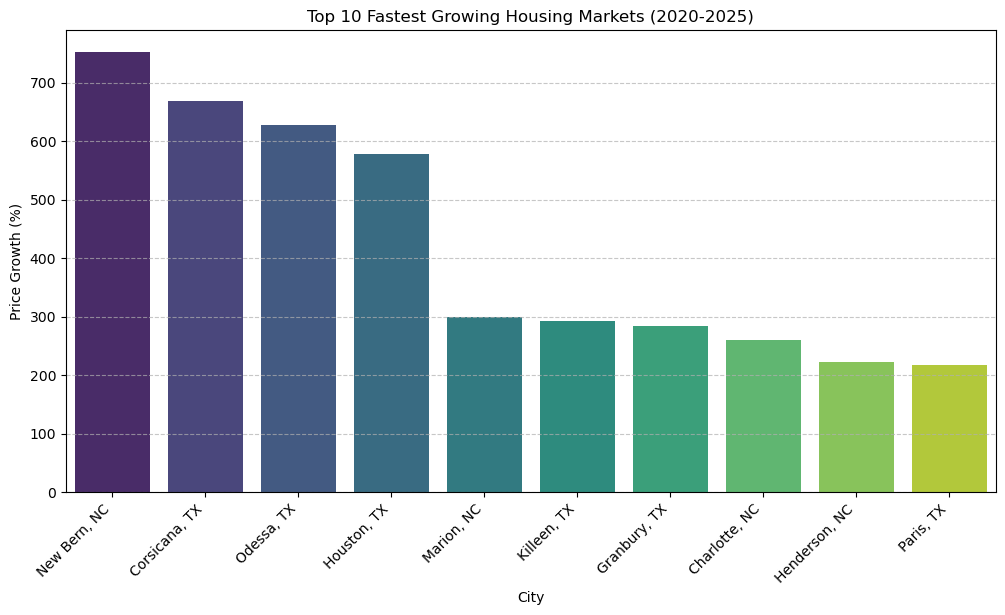

In [23]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_cities.index, 
    y=top_cities['growth_percent'], 
    palette="viridis"
)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Price Growth (%)")
plt.title("Top 10 Fastest Growing Housing Markets (2020-2025)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [24]:
# Extract year from period_begin
five_years_data['year'] = five_years_data['period_begin'].dt.year

C:\Users\andre\AppData\Local\Temp\ipykernel_17432\2632363121.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


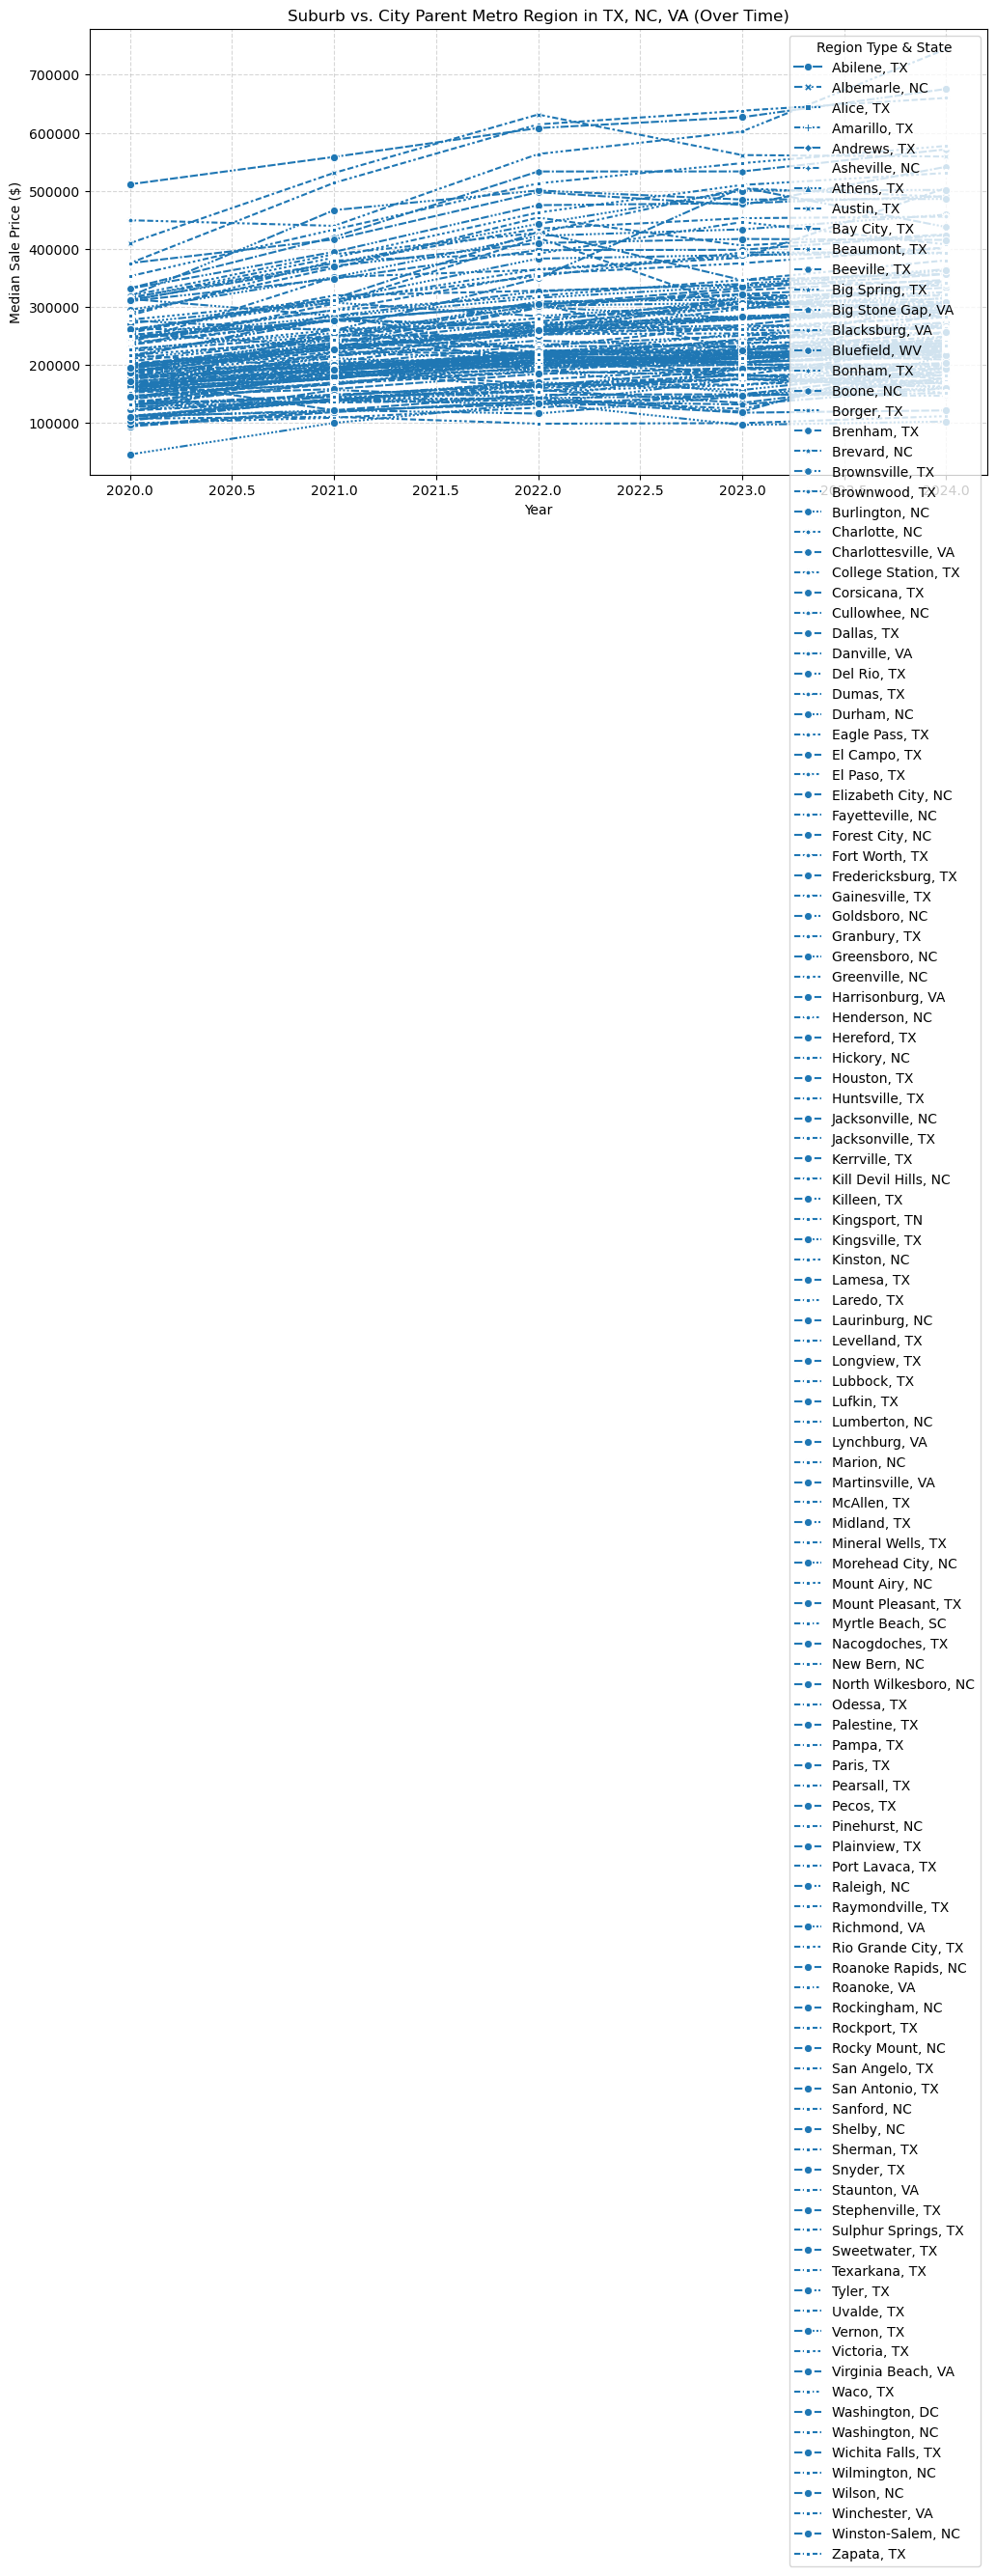

In [25]:
# Ensure we have region type column (e.g., 'region_type' or similar)
if 'parent_metro_region' in five_years_data.columns:
    # Filter for suburban areas and city parent metro regions
    df_filtered = five_years_data[five_years_data["state"].isin(["parent_metro_region"])]
    # Aggregate median sale price over time
    df_grouped = five_years_data.groupby(['year','parent_metro_region'])['median_sale_price'].mean().reset_index()

    # Plot the trends over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_grouped, 
        x='year', 
        y='median_sale_price',  
        style='parent_metro_region', 
        markers=True, 
        palette='coolwarm'
    )

    # Formatting
    plt.xlabel("Year")
    plt.ylabel("Median Sale Price ($)")
    plt.title("Suburb vs. City Parent Metro Region in TX, NC, VA (Over Time)")
    plt.legend(title="Region Type & State")
    plt.grid(True, linestyle="--", alpha=0.5)

    # Show the plot
    plt.show()

else:
    print("Error: column not found in the dataset. Check column names.")

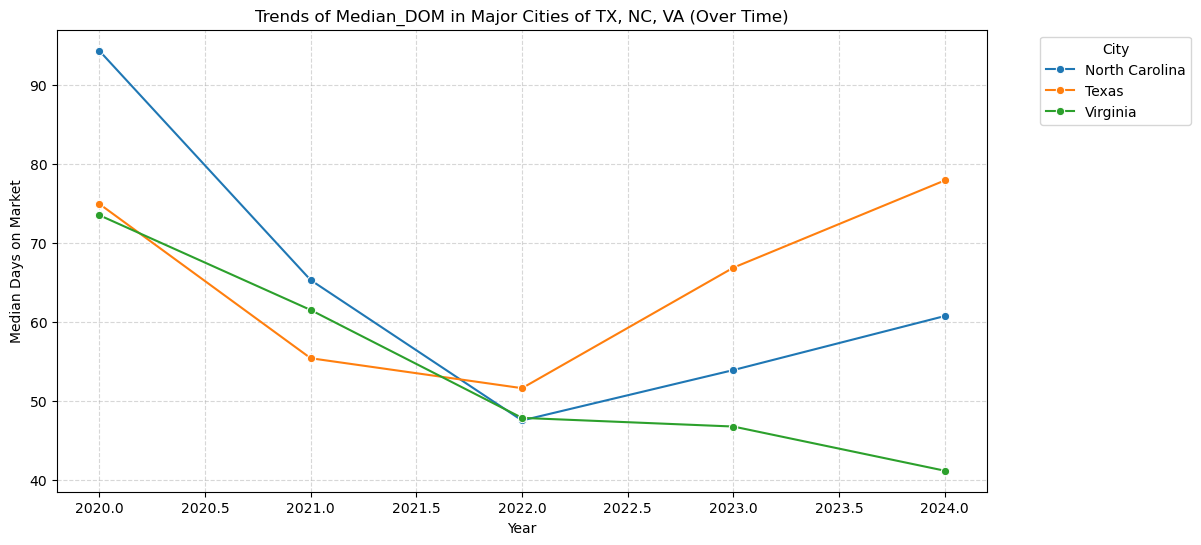

In [26]:
# Check if 'median_dom' and 'region_name' columns exist
if 'median_dom' in five_years_data.columns and 'state' in df_filtered.columns:
    
    # Group by year and city, then calculate average Median_DOM
    df_grouped = five_years_data.groupby(['year', 'state'])['median_dom'].mean().reset_index()

    # Select major cities (top 5 per state by lowest Median_DOM)
    major_cities = df_grouped.groupby('state')['median_dom'].mean().nsmallest(15).index
    df_major_cities = df_grouped[df_grouped['state'].isin(major_cities)]

    # Plot the trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_major_cities, 
        x='year', 
        y='median_dom', 
        hue='state', 
        marker='o', 
        palette='tab10'
    )

    # Formatting
    plt.xlabel("Year")
    plt.ylabel("Median Days on Market")
    plt.title("Trends of Median_DOM in Major Cities of TX, NC, VA (Over Time)")
    plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle="--", alpha=0.5)

    # Show the plot
    plt.show()

else:
    print("Error: 'median_dom' or 'region_name' column not found in the dataset. Check column names.")

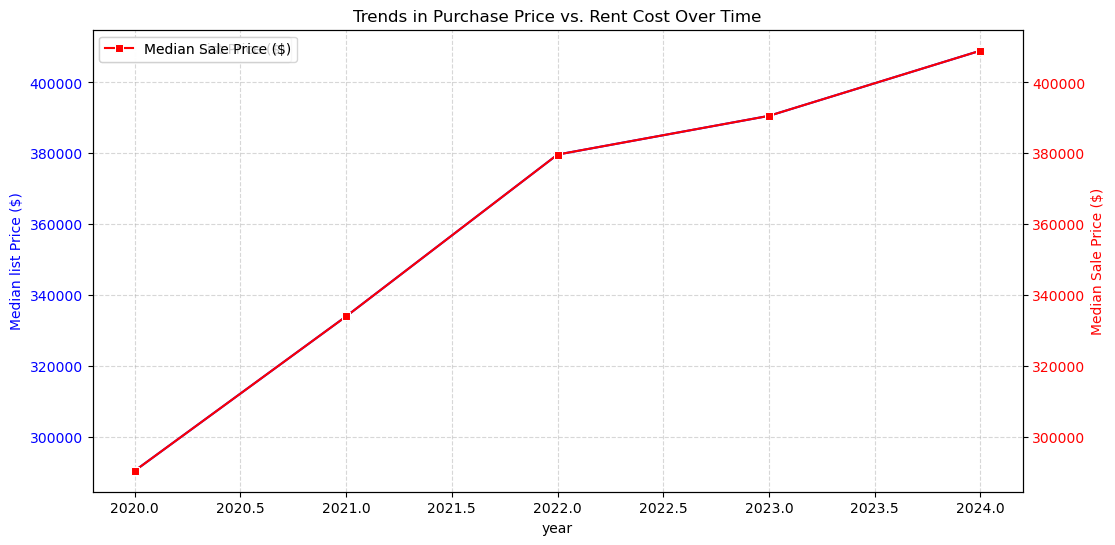

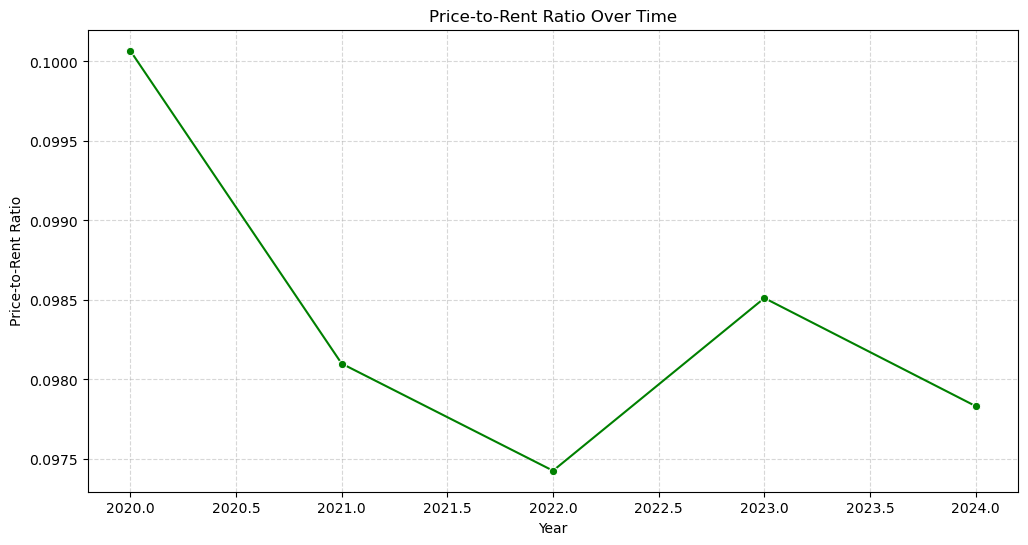

In [27]:
# Question 6 attempt
# Ensure necessary columns exist
if 'median_list_price' in five_years_data.columns and 'median_sale_price' in five_years_data.columns:
    
    # Calculate Price-to-Rent Ratio (higher values suggest it's better to rent, lower suggests better to buy)
    five_years_data['price_to_rent_ratio'] = five_years_data['median_list_price'] / (five_years_data['median_sale_price'] * 12)

    # Group by year and compute the average Price-to-Rent Ratio
    df_grouped = five_years_data.groupby('year')[['median_sale_price', 'price_to_rent_ratio']].mean().reset_index()

    # Create a dual-axis plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Median Sale Price
    sns.lineplot(data=df_grouped, x='year', y='median_sale_price', marker='o', ax=ax1, color='blue', label="Median List Price ($)")
    ax1.set_ylabel("Median list Price ($)", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")

    # Create a second y-axis
    ax2 = ax1.twinx()
    sns.lineplot(data=df_grouped, x='year', y='median_sale_price', marker='s', ax=ax2, color='red', label="Median Sale Price ($)")
    ax2.set_ylabel("Median Sale Price ($)", color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    # Titles and grid
    plt.title("Trends in Purchase Price vs. Rent Cost Over Time")
    ax1.grid(True, linestyle="--", alpha=0.5)

    # Show the plot
    plt.show()

    # Display Price-to-Rent Ratio trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped, x='year', y='price_to_rent_ratio', marker='o', color='green')

    plt.xlabel("Year")
    plt.ylabel("Price-to-Rent Ratio")
    plt.title("Price-to-Rent Ratio Over Time")
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

else:
    print("Error: Required columns ('median_sale_price' or 'median_rent_price') not found in the dataset. Check column names.")

C:\Users\andre\AppData\Local\Temp\ipykernel_17432\1436320038.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['price_to_rent_ratio'] = five_years_data['median_list_price'] / (five_years_data['median_sale_price'] * 12)


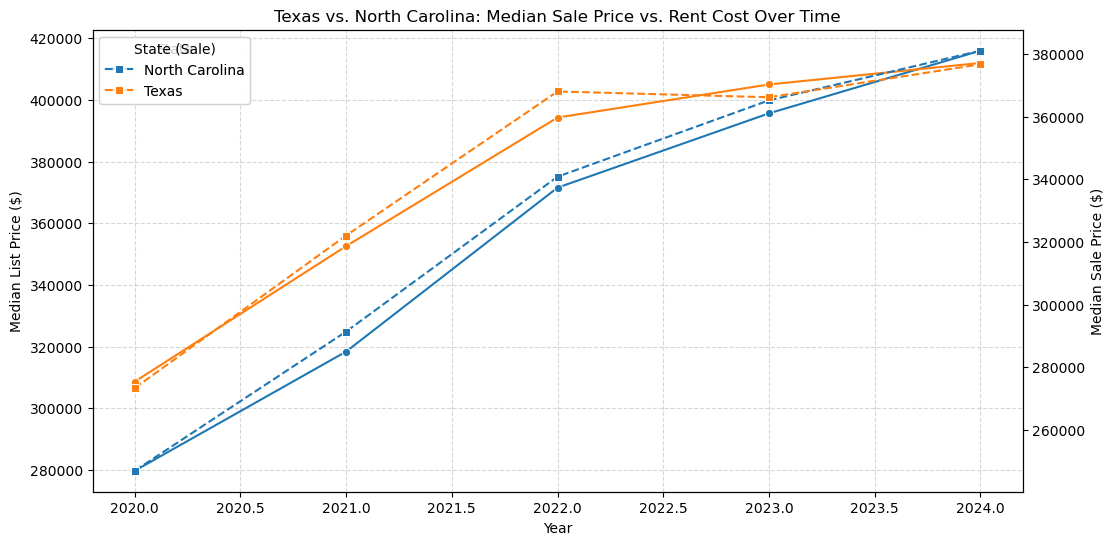

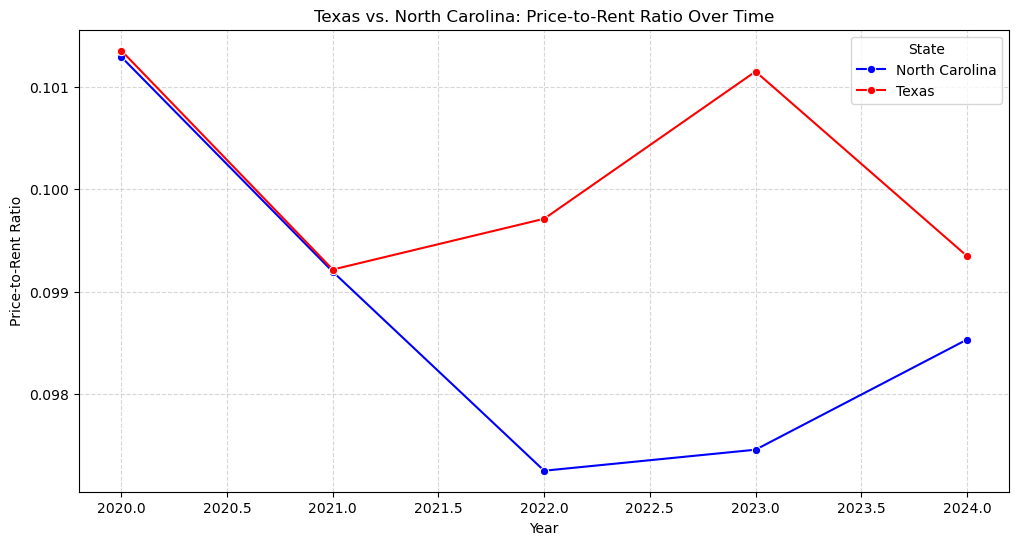

In [31]:
#attempting 6, second half of the question
# Filter for North Carolina (NC) and Texas (TX)
df_filtered = five_years_data[five_years_data['state'].isin(["North Carolina", "Texas"])]

# Ensure necessary columns exist
if 'median_sale_price' in five_years_data.columns and 'median_list_price' in five_years_data.columns:
    
    # Calculate Price-to-Rent Ratio
    df_filtered['price_to_rent_ratio'] = five_years_data['median_list_price'] / (five_years_data['median_sale_price'] * 12)

    # Group by year and state
    df_grouped = df_filtered.groupby(['year', 'state'])[['median_list_price', 'median_sale_price', 'price_to_rent_ratio']].mean().reset_index()

    # Create a dual-axis plot for purchase vs. rent price
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Median Sale Price
    sns.lineplot(data=df_grouped, x='year', y='median_list_price', hue='state', marker='o', ax=ax1)
    ax1.set_ylabel("Median List Price ($)")
    ax1.set_xlabel("Year")
    ax1.set_title("Texas vs. North Carolina: Median Sale Price vs. Rent Cost Over Time")
    ax1.legend(title="State")
    ax1.grid(True, linestyle="--", alpha=0.5)

    # Create a second y-axis for median rent price
    ax2 = ax1.twinx()
    sns.lineplot(data=df_grouped, x='year', y='median_sale_price', hue='state', marker='s', ax=ax2, linestyle="dashed")
    ax2.set_ylabel("Median Sale Price ($)")
    ax2.legend(title="State (Sale)", loc="upper left")

    plt.show()

    # Plot the Price-to-Rent Ratio trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_grouped, x='year', y='price_to_rent_ratio', hue='state', marker='o', palette=['blue', 'red'])

    plt.xlabel("Year")
    plt.ylabel("Price-to-Rent Ratio")
    plt.title("Texas vs. North Carolina: Price-to-Rent Ratio Over Time")
    plt.legend(title="State")
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

else:
    print("Error: Required columns ('median_list_price' or 'median_sale_price') not found in the dataset. Check column names.")